# Lecture 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import miepython as mp

%matplotlib inline
%config InlineBackend.figure_format = 'retina' 


plt.rcParams.update({'font.size': 16,
                     'axes.titlesize': 16,
                     'axes.labelsize': 14,
                     'axes.labelpad': 14,
                     'lines.linewidth': 2,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 14,
                     'ytick.labelsize' : 14,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

# center the plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Surface Plasmons

The interaction of metals with electromagnetic radiation is largely dictated by the free conduction electrons in the metal. According to the simple Drude model, the free electrons oscillate $180^{\circ}$ out of phase relative to the driving electric field. As a consequence, most metals possess a negative dielectric constant at optical frequencies which causes, for example, a very high reflectivity. Furthermore, at optical frequencies the metal's free electron gas can sustain surface and volume charge density oscillations, called **plasmon polaritons** or **plasmons** with distinct resonance frequencies. The existence of plasmons is characteristic of the interaction of metal nanostructures with light. Similar behavior cannot be simply reproduced in other spectral ranges using the scale invariance of Maxwell's equations since the material parameters change considerably with frequency. Specifically, this means that model experiments with, for instance, microwaves and correspondingly larger metal structures cannot replace experiments with metal nanostructures at optical frequencies. The surface charge density oscillations associated with surface plasmons at the interface between a metal and a dielectric can give rise to strongly enhanced optical near-fields which are spatially confined near the metal surface. Similarly, if the electron gas is confined in three dimensions, as in the case of a small subwavelength-scale particle, the overall displacement of the electrons with respect to the positively charged lattice leads to a restoring force, which in turn gives rise to specific particle-plasmon resonances depending on the geometry of the particle. In particles of suitable (usually pointed) shape, extreme local charge accumulations can occur that are accompanied by strongly enhanced optical fields.

The study of optical phenomena related to the electromagnetic response of metals has been recently termed plasmonics or nanoplasmonics. This rapidly growing field of nanoscience is mostly concerned with the control of optical radiation on the subwavelength scale. Many innovative concepts and applications of metal optics have been developed over the past few years and in this chapter we discuss a few examples. Since most of the physics of the interaction of light with metal structures is hidden in the frequency dependence of the metal's complex dielectric function, we begin with a discussion of the fundamental optical properties of metals. We then turn to important solutions of Maxwell's equations for noble metal structures, i.e. the plane metal–dielectric interface and subwavelength metallic wires and particles that show resonant behavior. Where appropriate, applications of surface plasmons in nano-optics are discussed. As nanoplasmonics is a very active field of study we can expect that many new applications will be developed in the years to come and that dedicated texts will be published. Finally, it should be noted that optical interactions similar to those discussed here are also encountered for infrared radiation interacting with polar materials. The corresponding excitations are called surface phonon polaritons.


## Optical properties of noble metals

We give here a short account with emphasis on the classical pictures of the physical processes involved. The optical properties of metals can be described by a complex dielectric function that depends on the frequency of light. The properties are determined mainly by the facts that 

* the conduction electrons can move freely within the bulk of material and 
* interband excitations can take place if the energy of the photons exceeds the bandgap energy of the respective metal 

In the picture we adopt here, the presence of an electric field leads to a displacement $\bf r$ of an electron, which is associated with a dipole moment $\mu$ according to $\mu = e\bf{r}$. The cumulative effect of all individual dipole moments of all free electrons results in a macroscopic polarization per unit volume $P$.

As mentioned during the *Photonics 1* course 

\begin{equation}
\bf{P}(\omega)=\epsilon_{0}\chi_{e}(\omega)\bf{E}(\omega)
\end{equation}

with which we construct the displacement field

\begin{equation}
D(\omega)=\epsilon_{0}\epsilon\bf{E}(\omega)=\epsilon_{0}\bf{E}+\bf{P}(\omega)
\end{equation}

with

\begin{equation}
\epsilon(\omega)=1+\chi_{e}(\omega)
\end{equation}

## Drude-Sommerfeld theory

As a starting point, we consider only the effects of the free electrons and apply the Drude–Sommerfeld model for the free-electron gas

\begin{equation}
m_{e}\frac{\partial^2 \bf{r}}{\partial t^2}+m_{e}\Gamma\frac{\partial \bf{r}}{\partial t}=e\bf{E}_{0}e^{-i\omega t}
\end{equation}

Note that the equation of motion contains no restoring force since free electrons are considered. The damping term is ruled by the Fermi velocity $v_{F}$ and the mean free path of the electrons $l$, i.e. $\Gamma=v_{F}/l$.

The above differential equation can be solved by assuming that the electrons move with the frequency of the external excitation $\bf{r}(t)=\bf{r_{0}}e^{-i\omega t}$, which yields the **Drude-Sommerfeld** version of the dielectric function of metals

\begin{equation}
\epsilon_{D}(\omega)=1-\frac{\omega_{p}^2}{\omega^2+i\Gamma\omega}
\end{equation}

with $\omega_{p}=\sqrt{ne^2/(m_{e}\epsilon_{0})}$ as the **volume plasmon frequency**. The damping factor and the volume plasmon frequency determine the dielectric function in the Drude model. For Gold, the corresponding values can be found with

\begin{equation}
\omega_{p}=13.8\times 10^{15}\, \rm{s}^{-1}
\end{equation}

and 

\begin{equation}
\Gamma=1.075\times 10^{14}\, \rm{s}^{-1}
\end{equation}

As the dielectric function is complex valued we may split it into real and imaginary parts

\begin{equation}
\epsilon_{D}(\omega)=1-\frac{\omega_{p}^2}{\omega^2+\Gamma^2}+i\frac{\Gamma\omega_{p}^2}{\omega(\omega^2+\Gamma^2)}
\end{equation}

The imaginary part represents the conductivity of the material. 


In [2]:
#Drude-Sommerfeld dielectric function
def epsilon_d(omega,gamma,omega_p):
    return(1-omega_p**2/(omega**2+1j*gamma*omega))

#conversion from wavelength in angular frequency
def freq(lam): # supply wavelength in nm
    c=299792458 # speed of light m/s
    return(2*np.pi*c/(lam*1e-9))

In [3]:
# parameters for gold
omega_p_d=13.8e15
gamma_d=1.075e14

#wavelength range
wavelength=np.arange(400,1000,1)

#dielectric function, complex!
epsilon=epsilon_d(freq(wavelength),gamma_d,omega_p_d)

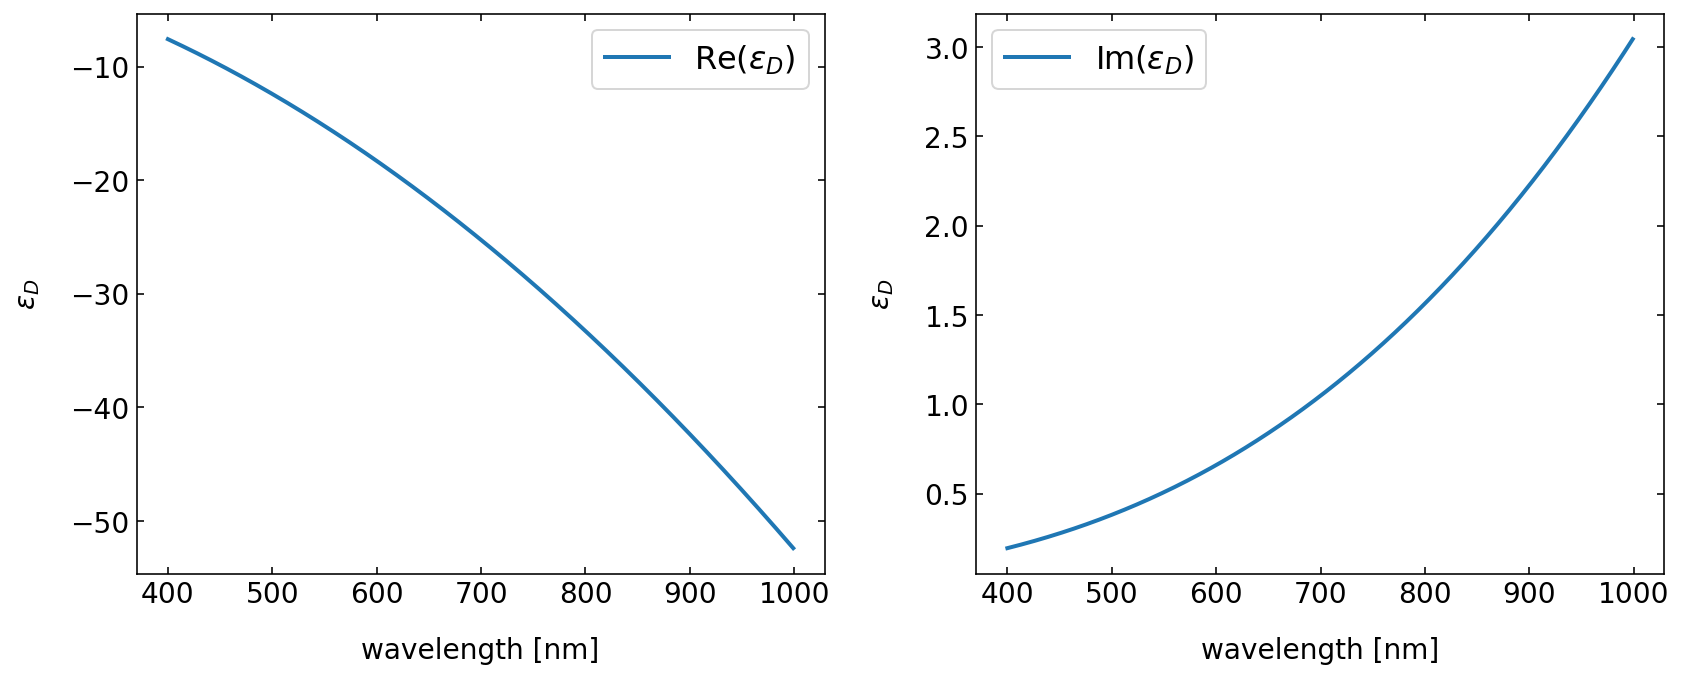

In [4]:
fig=plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(wavelength,np.real(epsilon),label='Re($\epsilon_{D}$)')
plt.xlabel('wavelength [nm]')
plt.ylabel(r'$\epsilon_{D}$')
plt.legend()

plt.subplot(122)
plt.plot(wavelength,np.imag(epsilon),label='Im($\epsilon_{D}$)')
plt.xlabel('wavelength [nm]')
plt.ylabel(r'$\epsilon_{D}$')
plt.legend()
plt.tight_layout()
plt.show()

We note that the real part of the dielectric constant is negative. One obvious consequence of this behavior is the fact that light can penetrate a metal only to a very small extent since the negative dielectric constant leads to a strong imaginary part of the refractive index $n=\sqrt{Re(\epsilon_{D})}$. The imaginary part of ε describes the dissipation of energy associated with the motion of electrons in the metal.

## Interband transition

Although the Drude–Sommerfeld model gives quite accurate results for the optical properties of metals in the infrared regime, it needs to be supplemented in the visible range by the response of bound electrons. For example for gold, at a wavelength shorter than ~550 nm, the measured imaginary part of the dielectric function in- creases much more strongly as predicted by the Drude–Sommerfeld theory. This is because higher-energy photons can promote electrons of lowerlying bands into the conduction band. 



The graph below sketches the origin of the actual transition on the band structure that is intrinsic to most noble metals. Au and Ag consist of filled d-bands and a partially filled sp-band (conduction band). Two types of transitions are allowed. On one side plasmonic excitation collectively excited the sp-band electrons. In the band structure language, this means that the electrons do a vertical transition at a well specified wavenumber (k). These transitions are called **intraband transition**. As there are only unoccupied states in the conduction band at different k-vectors, photons have to participate in the transition, which make them indirect and thus less likely. There are on the other hand also direct transition from the d-band to the sp-band possible. These are accordingly the **interband transitions**. These direct transition have a much higher transition probability, but the energetic position of the top of the d-band shifts them to the short wavelength edge of the visible spectrum for Au and completly to the UV in Ag. The optical transitions in silver, for example, are therefore solely determined by intraband transitions.  

![Band Structure Nobe Metal](bandstructure.png)

In a classical picture such transitions may be described by exciting the oscillation of bound electrons. Bound electrons in metals exist e.g. in lower-lying shells of the metal atoms. We apply the same method that was used above for the free electrons to describe the response of the bound electrons. The equation of motion for a bound electron reads as
\begin{equation}
m\frac{\partial^2 \bf{r}}{\partial t^2}+m\gamma\frac{\partial \bf{r}}{\partial t}+\alpha\bf{r}=e\bf{E}_{0}e^{-i\omega t}
\end{equation}

Note that we now changed the notation to for example the mass $m$, which is the *effective* mass of the bound electrons, which is determined by the band structure. Also the damping is now $\gamma$, which is rather the radiative damping of the electrons than the collisional losses. $\alpha$ is the spring constant representing the binding. 

This is now a driven damped harmonic oscillator and results in a complex dielectric function 

\begin{equation}
\epsilon_{I}(\omega)=1+\frac{\tilde{\omega}_{p}^2}{(\omega_{0}^2-\omega^2)-i\gamma\omega}
\end{equation}

$\tilde{\omega}_{p}=\sqrt{\tilde{n}e^2/(m_{e}\epsilon_{0})}$ is the plasmon frequency. $\omega_{0}=\sqrt{\alpha/m}$ is the eigenfrequency of the bound electrons. The complex dielectric function may be rewritten according to their real and imaginary parts as

\begin{equation}
\epsilon_{I}(\omega)=1+\frac{\tilde{\omega}_{p}^2(\omega_{0}^2-\omega^2)}{(\omega_{0}^2-\omega^2)^2+\gamma^2\omega^2}+i\frac{\gamma\tilde{\omega}_{p}^2\omega}{(\omega_{0}^2-\omega^2)^2+\gamma^2\omega^2}
\end{equation}



In [5]:
def epsilon_I(omega,gamma,omega_p,omega0):
    return(1+omega_p**2/((omega_0**2-omega**2)-1j*gamma*omega)+6)

In [6]:
# parameters for gold
omega_p_I=45e14
gamma_I=9e14
c=299792458
omega_0=2*np.pi*c/(450e-9)

c=299792458
#wavelength range
wavelength=np.arange(300,1000,1)

#dielectric function, complex!
epsilon=epsilon_I(freq(wavelength),gamma_I,omega_p_I,omega_0)
eps_all=epsilon+epsilon_d(freq(wavelength),gamma_d,omega_p_d)

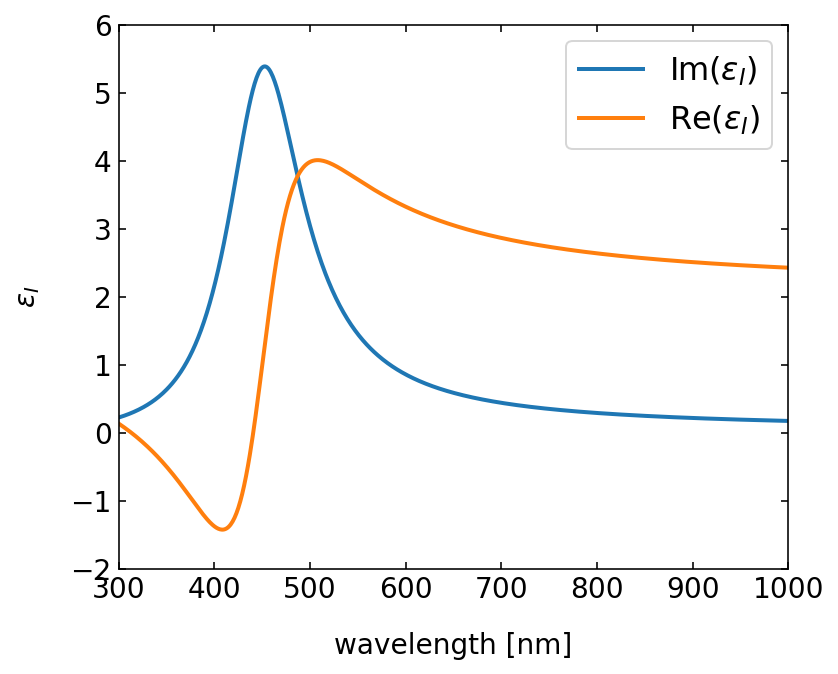

In [7]:
plt.figure(figsize=(6,5))
plt.plot(wavelength,np.imag(epsilon),label='Im($\epsilon_{I}$)')
plt.plot(wavelength,np.real(epsilon)-6,label='Re($\epsilon_{I}$)')
plt.xlabel('wavelength [nm]')
plt.ylabel(r'$\epsilon_{I}$')
plt.xlim(300,1000)
plt.ylim(-2,6)
plt.legend()
plt.show()

Clear resonant behavior is observed for the imaginary part and dispersion-like behavior is observed for the real part.

When comparing to experimental data, one now recognises that either free-electrons and bound electrons are contributing to the dielectric function. By just taking one inter-band transition and the Drude-Sommerfeld model, we obtain a good approximation of the dielectric function of gold at wavelength above 500 nm. Below 500 nm, other interband transitions contribute as well and we have to complicate our dielectric function.

In [8]:
## experimental data from Christy % Johnson
ref_lam=np.array([0.1879,0.1916,0.1953,0.1993,0.2033,0.2073,0.2119,0.2164,0.2214,0.2262,0.2313,0.2371,0.2426,0.2490,0.2551,0.2616,0.2689,0.2761,0.2844,0.2924,0.3009,0.3107,0.3204,0.3315,0.3425,0.3542,0.3679,0.3815,0.3974,0.4133,0.4305,0.4509,0.4714,0.4959,0.5209,0.5486,0.5821,0.6168,0.6595,0.7045,0.7560,0.8211,0.8920,0.9840,1.0880,1.2160,1.3930,1.6100,1.9370])
ref_n=np.array([1.28,1.32,1.34,1.33,1.33,1.30,1.30,1.30,1.30,1.31,1.30,1.32,1.32,1.33,1.33,1.35,1.38,1.43,1.47,1.49,1.53,1.53,1.54,1.48,1.48,1.50,1.48,1.46,1.47,1.46,1.45,1.38,1.31,1.04,0.62,0.43,0.29,0.21,0.14,0.13,0.14,0.16,0.17,0.22,0.27,0.35,0.43,0.56,0.92])
ref_k=np.array([1.188,1.203,1.226,1.251,1.277,1.304,1.350,1.387,1.427,1.460,1.497,1.536,1.577,1.631,1.688,1.749,1.803,1.847,1.869,1.878,1.889,1.893,1.898,1.883,1.871,1.866,1.895,1.933,1.952,1.958,1.948,1.914,1.849,1.833,2.081,2.455,2.863,3.272,3.697,4.103,4.542,5.083,5.663,6.350,7.150,8.145,9.519,11.21,13.78])

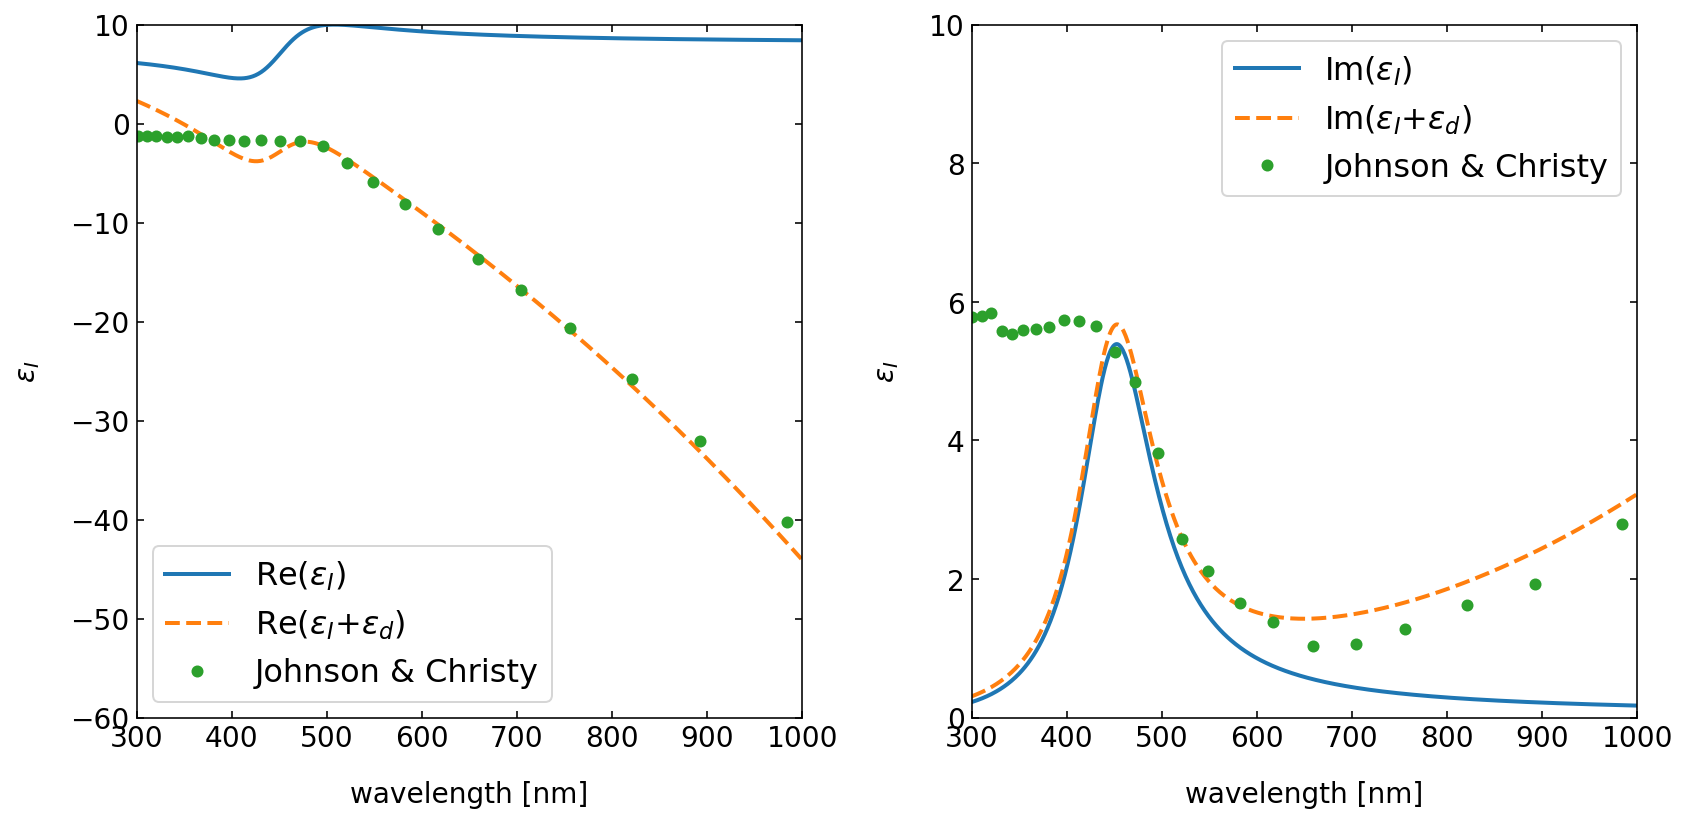

In [9]:
fig=plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(wavelength,np.real(epsilon),label='Re($\epsilon_{I}$)')
plt.plot(wavelength,np.real(eps_all),'--',label='Re($\epsilon_{I}$+$\epsilon_{d}$)')
plt.plot(ref_lam*1000,ref_n**2-ref_k**2,'.',label='Johnson & Christy')
plt.xlabel('wavelength [nm]')
plt.ylabel(r'$\epsilon_{I}$')
plt.xlim(300,1000)
plt.ylim(-60,10)
plt.legend()

plt.subplot(122)
plt.plot(wavelength,np.imag(epsilon),label='Im($\epsilon_{I}$)')
plt.plot(wavelength,np.imag(eps_all),'--',label='Im($\epsilon_{I}$+$\epsilon_{d}$)')
plt.plot(ref_lam*1000,2*ref_n*ref_k,'.',label='Johnson & Christy')
plt.xlabel('wavelength [nm]')
plt.ylabel(r'$\epsilon_{I}$')
plt.xlim(300,1000)
plt.ylim(0,10)
plt.legend()
plt.tight_layout()
plt.show()


## Surface plasmon polaritons at plane interfaces

By definition surface plasmons are the quanta of surface-charge-density oscillations, but the same terminology is commonly used for collective oscillations in the electron density at the surface of a metal. The surface charge oscillations are naturally coupled to electromagnetic waves, which explains their designation as polaritons. In this section, we consider a plane interface between two media. One medium is characterized by a general, complex frequency-dependent dielectric function $\epsilon_{1}(\omega)$ whereas the dielectric function of the other medium $\epsilon_{2}(\omega)$ is assumed to be real. We choose the interface to coincide with the plane $z = 0$ of a Cartesian coordinate system. We are looking for homogeneous solutions of Maxwell's equations that are localized at the interface. A homogeneous solution is an eigenmode of the system, i.e. a solution that exists without external excitation. Mathematically, it is the solution of the wave equation

![Figure 1](geometry.png)

\begin{equation}
\nabla\times\nabla\times{\bf E}({\bf r},\omega)-\frac{\omega^2}{c^2}\epsilon({\bf r},\omega){\bf E}({\bf r},\omega)=0
\end{equation}

with $\epsilon({\bf r},\omega) = \epsilon_{1}(\omega)$ if $z < 0$ and $\epsilon({\bf r},\omega) = \epsilon_{2}(\omega)$ if $z > 0$. The localization at the interface is characterized by electromagnetic fields that exponentially decay with increasing distance from the interface into both half-spaces. It is sufficient to consider only p-polarized waves in both half-spaces because no solutions exist for the case of s-polarization.

p-polarized plane waves in half-spaces j = 1 and j = 2 can be written as

\begin{equation}
{\bf E}_{j}=
  \begin{pmatrix}
    E_{j,x} \\
    0\\
    E_{j,z}
  \end{pmatrix}
  e^{ik_{x}x-i\omega t}e^{ik_{j,z}z}
\end{equation}

Since the wavevector parallel to the interface is conserved the following relations hold for the wavevector components

\begin{equation}
k_{x}^2+k_{j,z}^2=\epsilon_{j}k^2
\end{equation}

with $k=2\pi/\lambda$. As the displacement ${\bf D}$ field is source free $\nabla {\bf D}=0$, we also have 

\begin{equation}
k_{x}E_{j,x}+k_{j,z}E_{j,z}=0
\end{equation}

and thus 

\begin{equation}
{\bf E}_{j}=
  \begin{pmatrix}
    1 \\
    0\\
    -k_{x}/k_{j,z}
  \end{pmatrix}
e^{ik_{j,z}z}
\end{equation}

Requiring continuity of the parallel component of ${\bf E}$ and the perpendicular component of ${\bf D}$ leads to another set of equations which read as 

\begin{equation}
E_{1,x}-E_{2,x}=0
\end{equation}

and 

\begin{equation}
\epsilon_{1}E_{1,z}-\epsilon_{2}E_{2,z}=0
\end{equation}

This leads to a system of equations (eqn. 4, 6, 7) with the incident fields which has solutions only for $k_{x}=0$ or

\begin{equation}
\epsilon_{1}k_{2,z}-\epsilon_{2}k_{1,z}=0
\end{equation}

and thus leads to a dispersion relation, i.e. a relation between the wavevector along the propagation direction and the angular frequency $\omega$,

\begin{equation}
k_{x}^2=\frac{\epsilon_{1}\epsilon_{2}}{\epsilon_{1}+\epsilon_{2}}\frac{\omega^2}{c^2}
\end{equation}

and

\begin{equation}
k_{j,z}^2=\frac{\epsilon_{j}^2}{\epsilon_{1}+\epsilon_{2}}\frac{\omega^2}{c^2}
\end{equation}

In order to obtain a **“bound” solution**, we require that the normal components of the wavevector are purely imaginary in both media giving rise to exponentially decaying solutions. This can only be achieved if the **sum in the denominator is negative**. From this we conclude that the conditions for an interface mode to exist are $\epsilon_{1}\epsilon_{2}<0$ and $\epsilon_{1}+\epsilon_{2}<0$, which means that one of the dielectric functions must be negative with an absolute value exceeding that of the other. As we have seen in the previous section, metals, especially noble metals such as gold and silver, have a large negative real part of the dielectric constant along with a small imaginary part. Therefore, at the interface between a noble metal and a dielectric, such as glass or air, localized modes at the metal–dielectric interface can exist. 


We assume that the adjacent medium is a good dielectric with negligible losses, i.e. $\epsilon_{2}$ is assumed to be real. We then naturally obtain a complex parallel wavenumber $k_{x} = k_{x}^{\prime} + i k_{x}^{\prime\prime}$. The real part $k_{x}^{\prime}$ determines the SPP wavelength, while the imaginary part $k_{x}^{\prime\prime}$ accounts for the damping of the SPP as it propagates along the interface. For $|\epsilon_{1}^{\prime\prime}|<<|\epsilon_{1}^{\prime}|$ we find

\begin{equation}
k_{x}^{\prime}=\sqrt{\frac{\epsilon_{1}^{\prime}\epsilon_{2}}{\epsilon_{1}^{\prime}+\epsilon_{2}}}\frac{\omega}{c}
\end{equation}

and

\begin{equation}
k_{x}^{\prime\prime}=\sqrt{\frac{\epsilon_{1}^{\prime}\epsilon_{2}}{\epsilon_{1}^{\prime}+\epsilon_{2}}}\frac{\epsilon_{1}^{\prime\prime}\epsilon_{2}}{2\epsilon_{1}^{\prime}(\epsilon_{1}^{\prime}+\epsilon_{2})}\frac{\omega}{c}
\end{equation}

and the corresponding SPP wavelength of 

\begin{equation}
\lambda_{SPP}=\sqrt{\frac{\epsilon_{1}^{\prime}+\epsilon_{2}}{\epsilon_{1}^{\prime}\epsilon_{2}}}\lambda
\end{equation}

The $1/e$ decay length of the electric field is $1/k^{\prime\prime}$ or $1/(2k^{\prime\prime})$ for the intensity. This damping is caused by ohmic losses of the electrons participating in the SPP and finally results in a heating of the metal. Using $\epsilon_2 = 1$ and the dielectric functions of silver ($\epsilon_1 = −18.2 + 0.5i$) and gold ($\epsilon_1 = −11.6 + 1.2i$) at a wavelength of 633 nm, we obtain $1/e$ intensity propagation lengths of the SPP of ∼60 $\mu$m and ∼10 $\mu$m, respectively.

The decay length of the SPP electric fields away from the interface is be obtained 

\begin{equation}
k_{1,z}=\frac{\omega}{c}\sqrt{\frac{\epsilon_{1}^{\prime 2}}{\epsilon_{1}^{\prime}+\epsilon_{2}}}\left [1+i\frac{\epsilon_{1}^{\prime\prime}}{2\epsilon_{1}^{\prime}}\right]
\end{equation}

\begin{equation}
k_{2,z}=\frac{\omega}{c}\sqrt{\frac{\epsilon_{2}^{2}}{\epsilon_{1}^{\prime}+\epsilon_{2}}}\left [1-i\frac{\epsilon_{1}^{\prime\prime}}{2(\epsilon_{1}^{\prime}+\epsilon_{2}}\right]
\end{equation}

Using the same parameters for silver and gold as before and safely neglecting the very small imaginary parts we obtain for the $1/e$ decay lengths pairs $(1/ k_{1,z} , 1/ k_{2,z} )$ of the electric fields **(23 nm, 421 nm)** and **(28 nm, 328 nm)**, respectively. This shows that the decay into the metal is much shorter than into the dielectric. It also shows that a sizable amount of the SPP electric field can reach through a thin enough metal film. 

We can use our knowledge of the dielectric function of metals to understand some of the properties of the dispersion relation. According to equation 21 there are two special points in the dispersion relation. The first occurs when $\epsilon_{1}^{\prime}(\omega)=\epsilon_{2}$. At this frequency, the value of $k_{x}^{\prime}=\infty$, which means that the wavelength of the surface plasmon goes to zero ($\lambda_{SPP}=0$). This frequency is called surface plasmon frequency and is tze upper bound for the interface bound surface plasmon to exist.

The other special point occurs when $\epsilon_{1}^{\prime}(\omega)=0$. At this frequency, the wavevector $k_{x}^{\prime}=0$. This frequency is the volume plasma frequency. Above this frequency, the electrons in the whole metal volume are excited. The volume plasma frequency is the lower bound for the second branch of the plasmon disperion relation.

## Plot the dispersion relation

In [10]:
def k_x(epsilon_1,epsilon_2,omega):
    c=299792458
    return(np.sqrt((epsilon_1*epsilon_2*omega**2)/(epsilon_1+epsilon_2)/c**2))

In [11]:
# parameters for gold
omega_p_d=13.8e15
gamma_d=1.075e14


wavelength=np.arange(10,2000,0.0001)
test=np.abs(np.real(epsilon_d(freq(wavelength),gamma_d,omega_p_d))+1)
omega_spp=freq(wavelength[np.argmin(test)])

print("volume plasmon at: ",2*np.pi*c/np.sqrt(omega_p_d**2-gamma_d**2)*1e9,' nm')
print("surface plasmon at: ",wavelength[np.argmin(test)],' nm')
wavelength=np.arange(193.046,2000,0.1)
om=freq(wavelength)

#dielectric function, complex!
epsilon_1=epsilon_d(freq(wavelength),gamma_d,omega_p_d)
epsilon_2=1

kx_plasmon=k_x(epsilon_1,epsilon_2,om)

volume plasmon at:  136.50063200242616  nm
surface plasmon at:  193.04689999957338  nm


In [12]:
# parameters for gold
omega_p_d=13.8e15
gamma_d=1.075e14

wavelength2=np.arange(20,136.5,0.1)
om2=freq(wavelength2)

#dielectric function, complex!
epsilon_1=epsilon_d(freq(wavelength2),gamma_d,omega_p_d)
epsilon_2=1

kx_plasmon2=k_x(epsilon_1,epsilon_2,om2)

(0.0, 3e+16)

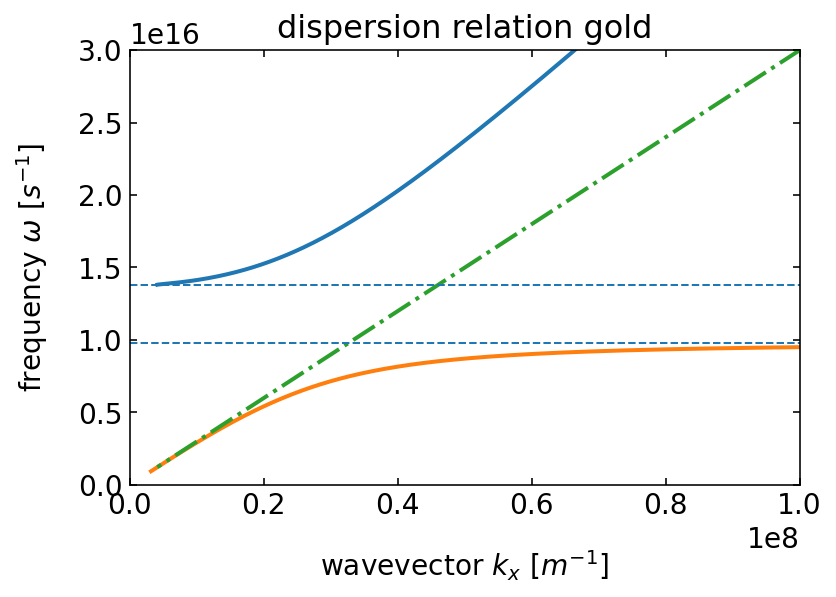

In [13]:
#plt.plot(np.real(kx_low),freq(wavelength_low))
plt.plot(np.abs(kx_plasmon2),om2)
plt.plot(np.abs(kx_plasmon),om)
plt.plot(np.abs(kx_plasmon2),np.abs(kx_plasmon2)*c,'-.')
plt.axhline(y=np.sqrt(omega_p_d**2-gamma_d**2),linestyle='--',linewidth=1)
plt.axhline(y=omega_spp,linestyle='--',linewidth=1)
plt.xlabel('wavevector $k_{x}$ [$m^{-1}$]')
plt.ylabel('frequency $\omega$ [$s^{-1}$]')
plt.title('dispersion relation gold')
plt.xlim(0,10e7)
plt.ylim(0,3e16)

### Plot the penetration depth

In [14]:
def k_z(epsilon_j,epsilon1,epsilon2,omega):
    c=299792458
    return(np.sqrt(epsilon_j**2/(epsilon_1+epsilon_2)*omega**2/c**2))

In [15]:
# parameters for gold
omega_p_d=13.8e15
gamma_d=1.075e14

wavelength=np.arange(400,1000,0.1)
om=freq(wavelength)

#dielectric function, complex!
epsilon_1=epsilon_d(freq(wavelength),gamma_d,omega_p_d)
epsilon_2=1

kz_gold=k_z(epsilon_1,epsilon_1,epsilon_2,om)
kz_air=k_z(epsilon_2,epsilon_1,epsilon_2,om)

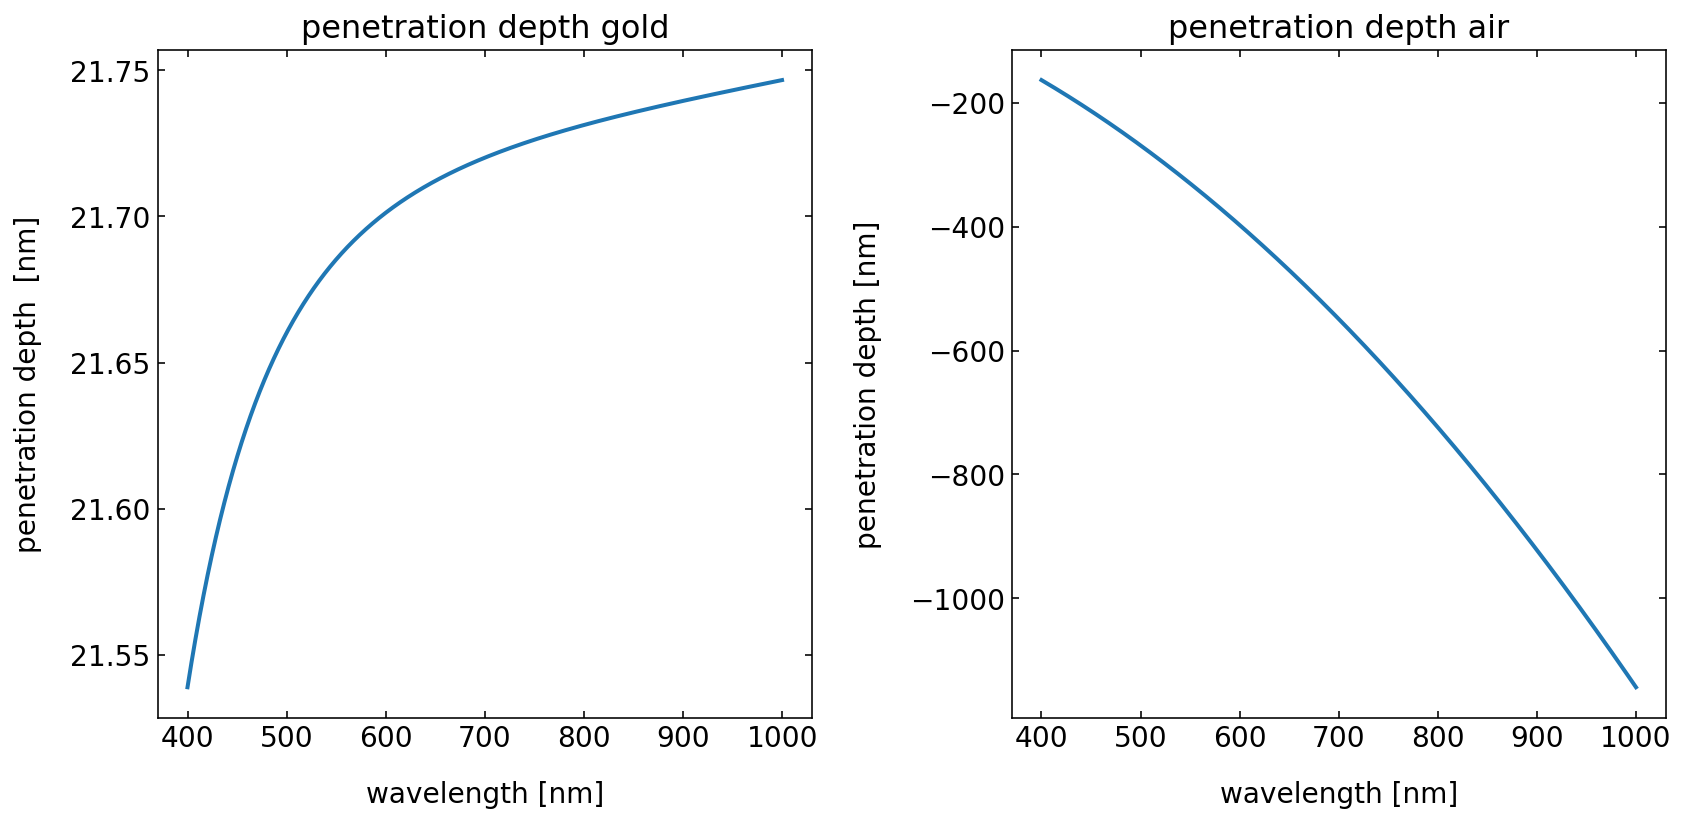

In [16]:
fig=plt.figure(figsize=(12,6))

plt.subplot(121)
plt.title('penetration depth gold')
plt.plot(wavelength,1e9/np.imag(kz_gold))
plt.xlabel('wavelength [nm]')
plt.ylabel('penetration depth  [nm]')

plt.subplot(122)
plt.title('penetration depth air')
plt.plot(wavelength,1e9/np.imag(kz_air))
plt.xlabel('wavelength [nm]')
plt.ylabel('penetration depth [nm]')
plt.tight_layout()
plt.show()

## Exciting Surface Plasmons

The above image shows the disperion relation for the surface plasmon and the dispersion relation for free space propagation of light as the dash-dot line. What you might notice, is that both curves do not intersect, but as we noted above, the wavevector along of the surface plasmon and the incident light have to match at the boundary. In other words the momentum of the photon in free space is insufficient to excite the surface plasmon.

The physical reason for the increased momentum of the SPP is the strong coupling between light and surface charges. The light field has to “drag” the electrons along the metal surface. Consequently, this means that a SPP on a plane interface cannot be excited by light of any frequency that propagates in free space.

![Figure 2](excitation.png)

Excitation of a SPP by light is only possible if a wavevector component of the exciting light can be increased over its free-space value. There are several ways to achieve this increase of the wavevector component. The conceptually most simple solution is to excite surface plasmons by means of evanescent waves created at the interface between a medium with refractive index $n>1$.

**Otto configuration**

In the Otto configuration the tail of an evanescent wave at a glass/air interface is brought into contact with a metal/air interface that supports SPPs. For a sufficiently large separation between the two interfaces (gapwidth) the evanescent wave is only weakly influenced by the presence of the metal. By tuning the angle of incidence of the totally reflected beam inside the prism, the resonance condition for excitation of SPPs, i.e. the matching of the parallel wavevector com- ponents, can be fulfilled. The excitation of a SPP will show up as a minimum in the reflected light. The reflectivity of the system as a function of the angle of incidence and of the gapwidth


![Figure 3](plasmon_resonance.png)

For the angle of incidence a clear resonance is observed at $43.5^{\circ}$. For a small gapwidth the resonance is broadened and shifted due to radiation damping of the SPP. This is caused by the presence of the glass half-space, which allows the SPP to rapidly decay radiatively by transforming the evanescent SPP field into a propagating field in the glass. For a gapwidth that is too large the SPP can no longer be efficiently excited and the resonance vanishes.

**Kretschmann configuration**

The Kretschmann configuration is an alternative method to excite SPP. In his method, a thin metal film is deposited on top of a prism. To excite a surface plasmon at the metal/air interface an evanescent wave created at the glass/metal interface has to penetrate through the metal layer. Here, similar arguments apply as for the Otto configuration. If the metal is too thin, the SPP will be strongly damped because of radiation damping into the glass. If the metal film is too thick the SPP can no longer be efficiently excited due to absorption in the metal. 

![Figure 4](plasmon_kretschmann.png)

The figure shows the reflectivity of the excitation beam as a function of the metal film thickness and the angle of incidence. As before, the resonant excitation of surface plasmons is characterized by a dip in the reflectivity curves.

## Calculation of the angle dependent reflectivity

The calculation below requires the **tmm** module to be installed. This is a trnasfer matrix method, which allows the calculation of tranmission and reflectivity through multilayer structures. The example shows the plasmon resonance excitation of a thin film (50 nm) at a wavelength of 532 nm in a Kretschmann configuration. To change to other wavelength please adjust the refractive index of the metal for the new wavelength. A database of refractive indices is found at

https://refractiveindex.info



In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, inf

%matplotlib inline
degree = pi/180

from tmm import coh_tmm

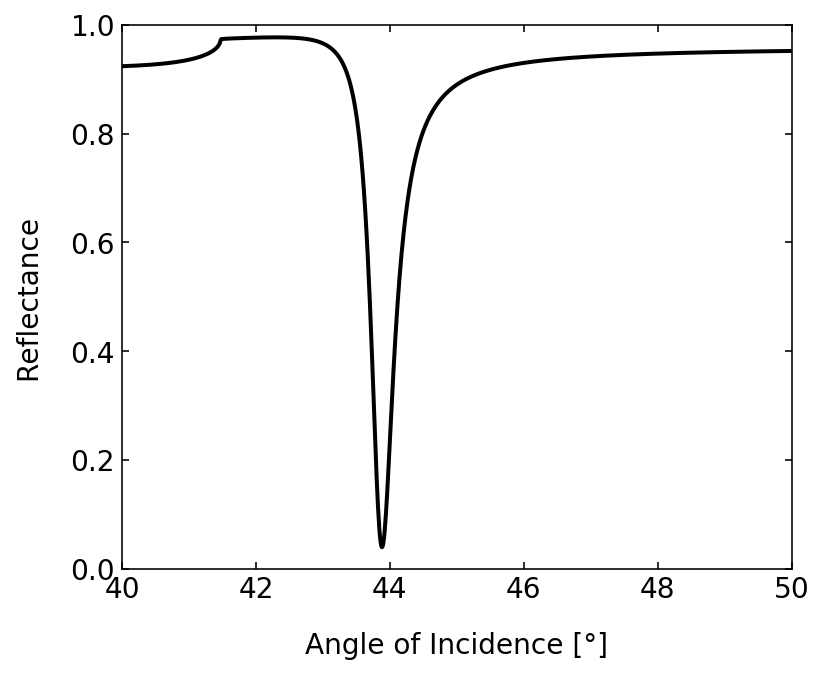

In [31]:
d_list = [inf, 50, inf] # list of layer thicknesses in nm
#n_list = [1.51, 0.54386+2.2309*1j, 1] # list of refractive indices with Au
n_list = [1.51, 0.054007+3.4290*1j, 1] # list of refractive indices with Ag
lda = 532 # wavelength in nm
theta_list = np.linspace(40*degree, 60*degree, 2000) # list of angles to plot
Rp = [] 
for theta in theta_list:
    Rp.append(coh_tmm('p', n_list, d_list, theta, lda)['R'])
    
fig, ax = plt.subplots(1, 1, figsize=(6,5))
ax.plot(theta_list/degree, Rp, 'k')
ax.set_xlabel('Angle of Incidence [°]')
ax.set_ylabel('Reflectance')
ax.set_xlim(40, 50)
ax.set_ylim(0, 1)
plt.show()

## Surface plasmon sensors

The distinct resonance condition associated with the excitation of surface plasmons has found application in various sensors. For example, the position of the dip in the reflectivity curves can be used as an indicator for environmental changes. With this method, the adsorption or removal of target materials on the metal surface can be detected with submonolayer accuracy. 

![Figure 5](sensor_application.png)

The figure illustrates this capability by a simulation. It shows the effect of a 3 nm layer of water on top of a 53 nm thick silver film on glass. A strongly shifted plasmon resonance curve can be observed. Assuming that the angle of incidence of the excitation beam has been adjusted to the dip in the reflectivity curve, the deposition of a minute amount of material increases the signal (reflectivity) drastically. This means that the full dynamic range of a low-noise intensity measurement can be used to measure a coverage ranging between 0 and 3 nm. Consequently, SPP sensors are very attractive for applications ranging from biological binding assays to environmental sensing.